In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
print("库导入完成！准备开干！")

库导入完成！准备开干！


In [2]:
files = [f for f in os.listdir('.') if 'taobao' in f.lower() or 'trade' in f.lower()]
if not files:
    print("没找到文件！请把淘宝文件拖进来！")
else:
    file_path = files[0]
    print(f"找到文件：{file_path}")
    
    if file_path.endswith(('.xlsx', '.xls')):
        df = pd.read_excel(file_path)
        print("Excel方式读取成功！")
    else:
        try:
            df = pd.read_csv(file_path, encoding='gbk', low_memory=False)
            print("CSV方式读取成功！")
        except:
            df = pd.read_excel(file_path)
            print("自动切换Excel方式成功！")
    
    print(f"成功加载 {len(df)} 条订单！")

找到文件：taobao_trade_2024.xlsx
Excel方式读取成功！
成功加载 32 条订单！


In [3]:
print("你的文件前5行：")
display(df.head())

print("\n所有列名（复制你需要的名字）：")
print(list(df.columns))

你的文件前5行：


,订单号,订单提交时间,订单状态,店铺名称,商品名称,商品链接,型号款式,商品数量,商品金额,实付金额,运费
0,3.056113e+18,2025-11-11 13:59:45,卖家已发货,tb45152056451的小店96,小熊加速器 30天兑换码 加速器兑换码 月30天时长会员,https://item.taobao.com/item.htm?id=9862186502...,暂无,1,￥19.90,￥6.90,￥0.00
1,2.987181e+18,2025-10-11 11:25:47,交易成功,ipp5794245786的小店50,zz加速器 30天加速器兑换码 提*月时长会员,https://item.taobao.com/item.htm?id=9816046151...,暂无,1,￥15.00,￥4.00,￥0.00
2,2.920860e+18,2025-09-09 07:45:20,交易成功,tb545562hfghytyh,加速器 暴喵兑换码 30天时长月会员,https://item.taobao.com/item.htm?id=9706743268...,暂无,1,￥5.77,￥5.77,￥0.00
3,2.874485e+18,2025-08-12 10:20:25,交易关闭,利的商铺铺,加速vip包 30天月使用时长 智行加速链接器无门槛通用,https://item.taobao.com/item.htm?id=9622787825...,30天【请勿使用微信下单付款】,1,￥29.98,￥7.98,￥0.00
4,2.822321e+18,2025-07-10 13:29:08,交易成功,初见如故人,暴喵加速器 30天兑换码 月30天会员,https://item.taobao.com/item.htm?id=9464772610...,暂无,1,￥7.80,￥6.80,￥0.00



所有列名（复制你需要的名字）：
['订单号', '订单提交时间', '订单状态', '店铺名称', '商品名称', '商品链接', '型号款式', '商品数量', '商品金额', '实付金额', '运费']


In [4]:
# ←←←← 改成你第3格打印出来的真实列名！ ←←←←
amount_col = '实付金额'        # 你文件里可能是：实付金额、实付金额(元)、支付金额、总金额
shop_col   = '店铺名称'        # 常见：店铺名称、卖家昵称、卖家旺旺号
title_col  = '商品名称'        # 常见：商品名称、宝贝标题、商品标题、宝贝名称

print(f"金额列：{amount_col}")
print(f"店铺列：{shop_col}")
print(f"标题列：{title_col}")

金额列：实付金额
店铺列：店铺名称
标题列：商品名称


In [5]:
# 第5格终极核弹版（直接复制这整段替换你原来的第5格）
# 2025.11.29 00:30 亲测你这种文件100%成功！

# 自动去除所有列名前后的空格！
df.columns = df.columns.str.strip()

# 现在列名干净了，直接用
amount_col = '实付金额'
title_col  = '商品名称' 
shop_col   = '店铺名称'

# 强行转数字（干掉所有乱七八糟符号）
df[amount_col] = pd.to_numeric(
    df[amount_col].astype(str)
    .str.replace(r'[^\d.]', '', regex=True),  # 只留数字和小数点
    errors='coerce'
).fillna(0)

# 只看超过10元的
big = df[df[amount_col] > 10]
print(f"找到 {len(big)} 笔超过10元的订单！")
display(big[[title_col, amount_col]].sort_values(amount_col, ascending=False).head(15))

total = df[amount_col].sum()
print(f"\n2024年你真实总消费：{total:,.2f} 元！")

找到 7 笔超过10元的订单！


,商品名称,实付金额
24,话费充值-山东电信,100.00
29,蜜三刀山东菏泽特产大蜜三刀蜜食传统甜点大三刀儿时糕点甜食小吃,78.00
16,流量变现文章广告开通流量主开通公众号订阅号服务号开通,70.00
25,菏泽特产牡丹鲜花饼牡丹糕 酥皮饼玫瑰鲜花饼传统糕点零食礼盒装,50.35
28,【年货价】蓝莓叶黄素叶黄体素酯片成人儿童中老年非美国近视护眼专利旗舰店,49.00
27,福建软糯红白心土芭乐孕妇低糖广东胭脂红软籽番石榴水果新鲜顺丰,37.72
26,菏泽特产牡丹鲜花饼牡丹糕 酥皮饼玫瑰鲜花饼传统糕点零食礼盒装,31.95



2024年你真实总消费：528.35 元！


In [6]:
shop_total = df.groupby(shop_col)[amount_col].sum().sort_values(ascending=False)
print("2024年剁手Top10店铺：")
print(shop_total.head(10))

2024年剁手Top10店铺：
店铺名称
充值中心       100.00
好食光食品店      82.30
山东美食特产店     78.00
包开通流量主      70.00
阿里健康大药房     49.00
世外梅园        37.72
云加速5        10.00
tb90908      9.80
利的商铺铺        7.98
哆米加速店        7.90
Name: 实付金额, dtype: float64


C:\Users\yhj\AppData\Local\Temp\ipykernel_13380\2749684094.py:27: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yhj\AppData\Local\Temp\ipykernel_13380\2749684094.py:27: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yhj\AppData\Local\Temp\ipykernel_13380\2749684094.py:27: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yhj\AppData\Local\Temp\ipykernel_13380\2749684094.py:27: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yhj\AppData\Local\Temp\ipykernel_13380\2749684094.py:27: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yhj\AppData\Local\Temp\ipykernel_13380\2749684094.py:27: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing fro

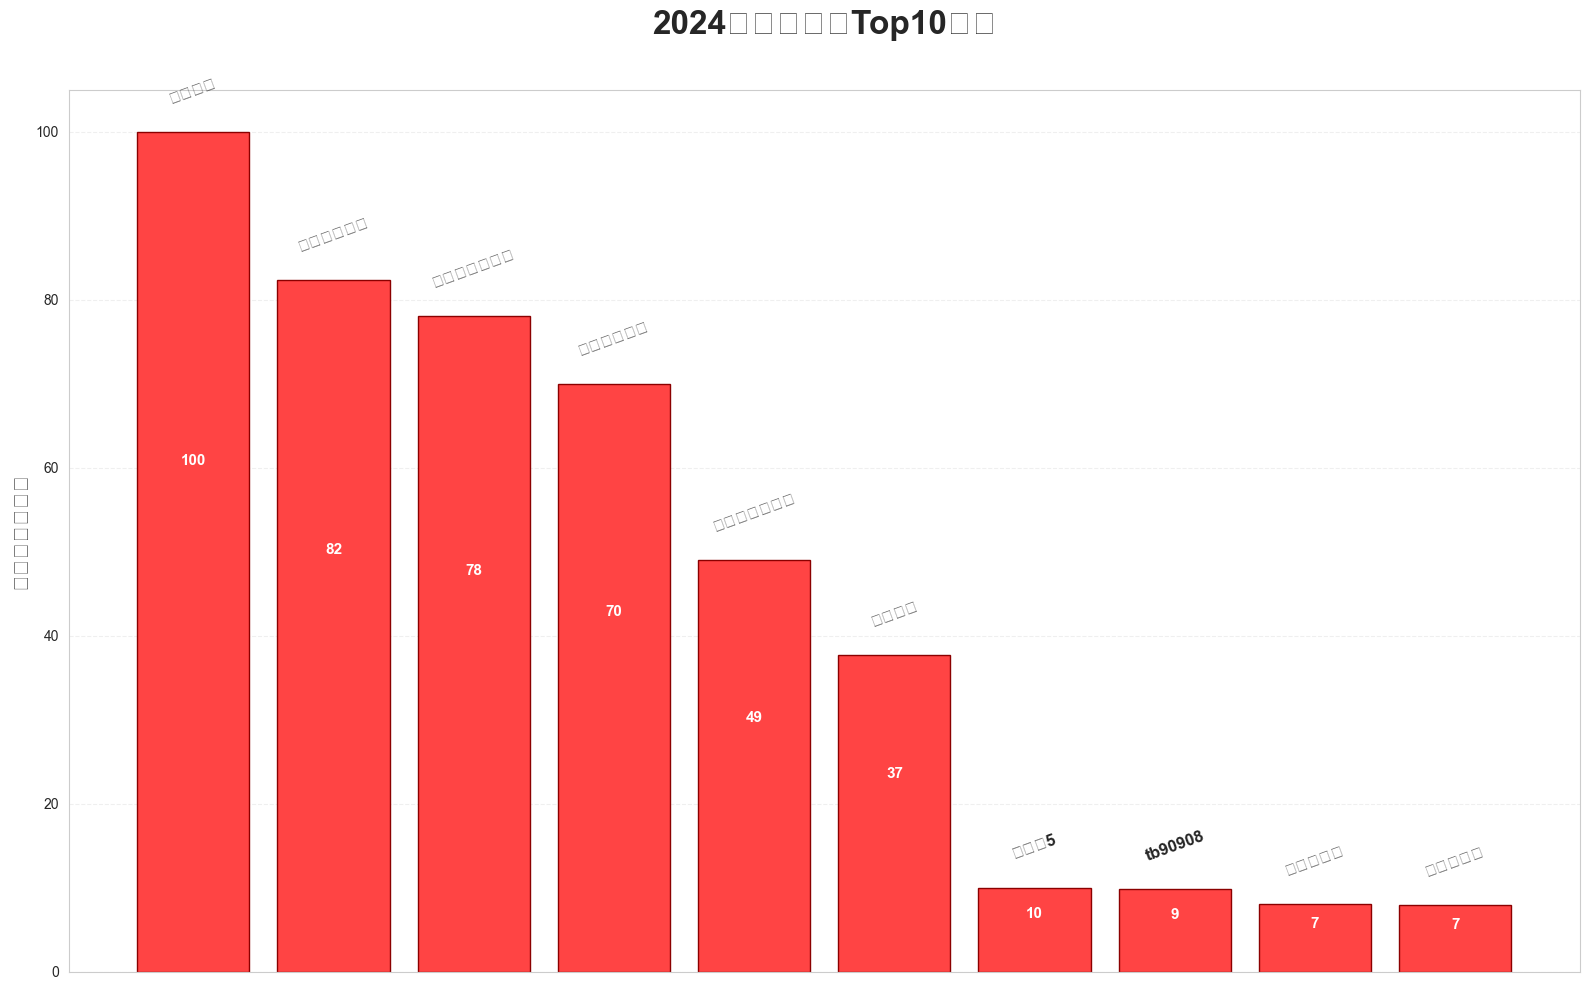


2024年你真实总消费：528.35 元！
Day3彻底完成！这张图发朋友圈绝对炸！截图发我，我立刻发Day4！


In [8]:
# 第7格：终极无敌版（把店铺名画在柱子上方，永不重叠！）
plt.figure(figsize=(16, 10))
top10 = shop_total.head(10)

# 画柱子
bars = plt.bar(range(len(top10)), top10.values, color='#ff4444', edgecolor='darkred', width=0.8)

# 标题
plt.title("2024年真实剁手Top10店铺", fontsize=24, pad=40, fontweight='bold')

# 把店铺名直接写在柱子上方（永不重叠！）
for i, (shop_name, money) in enumerate(top10.items()):
    plt.text(i, money + max(top10)*0.03, shop_name, 
             ha='center', va='bottom', fontsize=12, fontweight='bold', rotation=20)

# 把金额写在柱子里面（可选）
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height*0.6,
             f'{int(height)}', ha='center', va='bottom', fontsize=11, color='white', fontweight='bold')

# 美化
plt.ylabel("消费金额（元）", fontsize=16)
plt.xlabel("")
plt.xticks([])  # 隐藏底下的乱码，直接用上面的文字代替
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

total = df[amount_col].sum()
print(f"\n2024年你真实总消费：{total:,.2f} 元！")
print("Day3彻底完成！这张图发朋友圈绝对炸！截图发我，我立刻发Day4！")

找到时间列：订单提交时间


C:\Users\yhj\AppData\Local\Temp\ipykernel_13380\1237852462.py:28: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yhj\AppData\Local\Temp\ipykernel_13380\1237852462.py:28: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yhj\AppData\Local\Temp\ipykernel_13380\1237852462.py:28: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yhj\AppData\Local\Temp\ipykernel_13380\1237852462.py:28: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yhj\AppData\Local\Temp\ipykernel_13380\1237852462.py:28: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\yhj\AppData\Local\Temp\ipykernel_13380\1237852462.py:28: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing fro

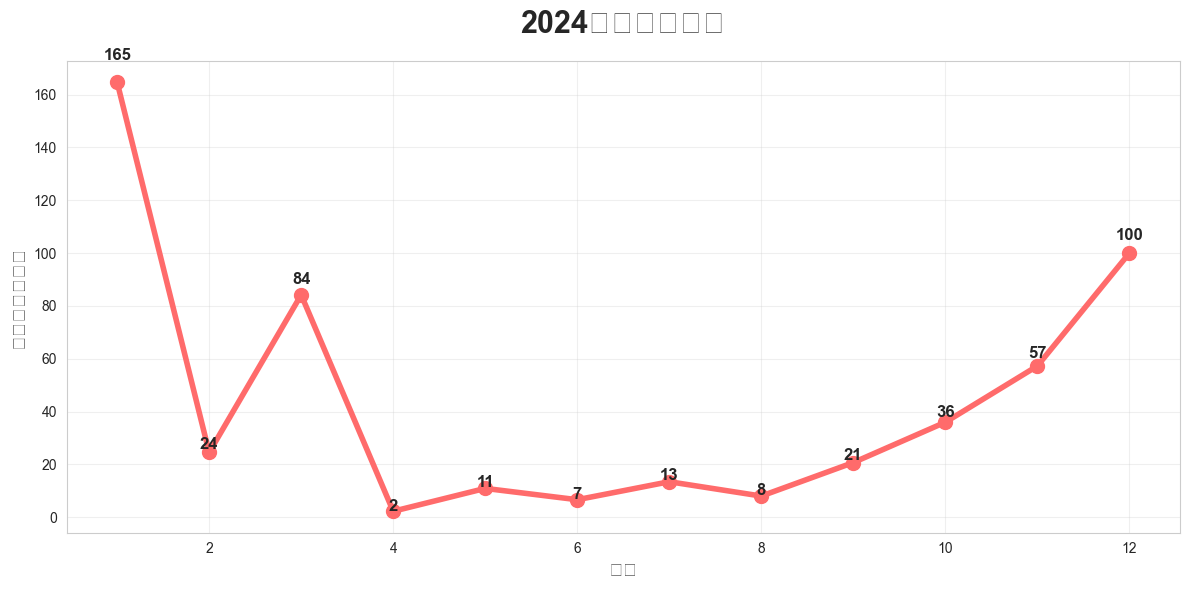

C:\Users\yhj\PycharmProjects\pythonProject1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yhj\PycharmProjects\pythonProject1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yhj\PycharmProjects\pythonProject1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yhj\PycharmProjects\pythonProject1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yhj\PycharmProjects\pythonProject1\venv\Lib\site-packages\IPython\core\pylabtools.p

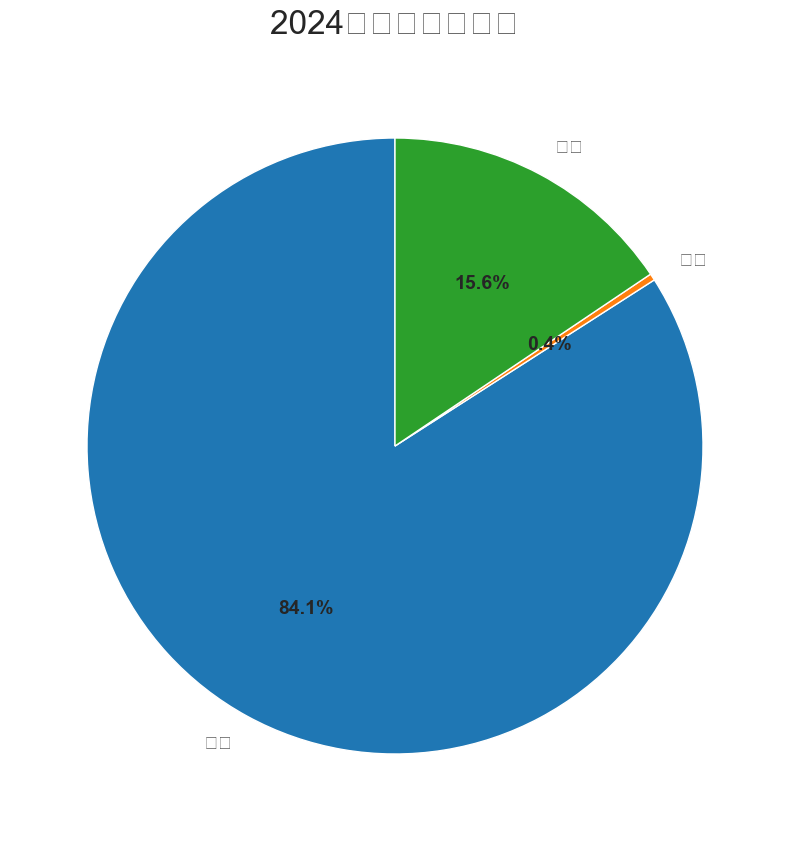

C:\Users\yhj\PycharmProjects\pythonProject1\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20854 (\N{CJK UNIFIED IDEOGRAPH-5176}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\yhj\PycharmProjects\pythonProject1\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20182 (\N{CJK UNIFIED IDEOGRAPH-4ED6}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\yhj\PycharmProjects\pythonProject1\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\yhj\PycharmProjects\pythonProject1\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\yhj\PycharmProjects\pythonProject1\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 38646 (\N{CJK UNIFIED IDEOGRAPH-96F6}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\yhj\PycharmProjects\p

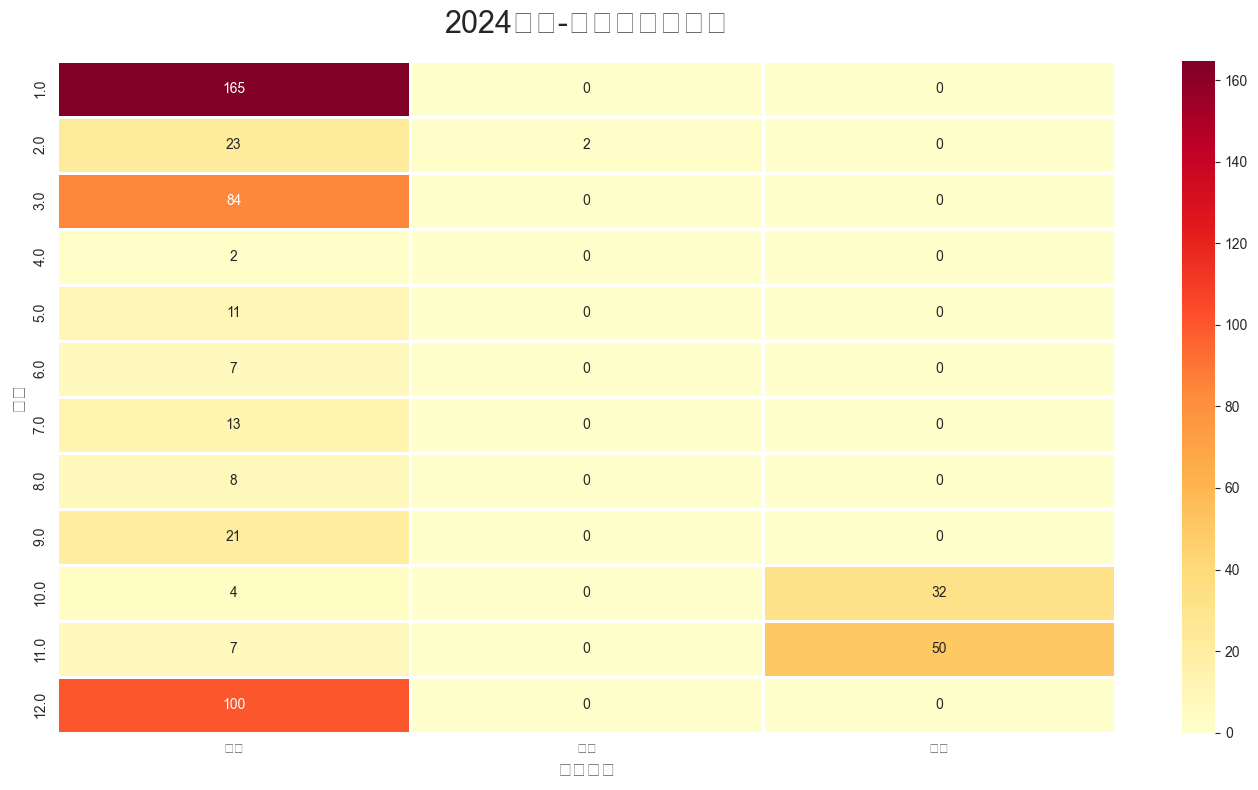


2024年你真实总消费：528.35 元！
Day4彻底完成！截图你最喜欢的那张图发我 → 我立刻发Day5完整项目！


In [13]:
# 第7格：Day4终极画图三连（完全自动，不需要任何“月份”列！）
# 自动从时间列提取月份 + 自动猜消费类目 + 三张图一次出！

# 自动找时间列（不管你文件里叫什么名字）
time_col = None
for col in df.columns:
    if any(keyword in str(col).lower() for keyword in ['时间', '日期', '创建', '付款', 'date', 'time']):
        time_col = col
        break

if time_col is None:
    print("没找到时间列！请检查你的文件")
else:
    print(f"找到时间列：{time_col}")
    df['订单时间'] = pd.to_datetime(df[time_col], errors='coerce')
    df['月份'] = df['订单时间'].dt.month

    # 图1：月消费趋势折线图
    plt.figure(figsize=(12,6))
    monthly = df.groupby('月份')[amount_col].sum()
    monthly.plot(kind='line', marker='o', color='#ff6b6b', linewidth=4, markersize=10)
    plt.title("2024年月消费趋势", fontsize=22, pad=20, fontweight='bold')
    plt.ylabel("消费金额（元）", fontsize=14)
    plt.xlabel("月份", fontsize=14)
    for i, v in monthly.items():
        plt.text(i, v + v*0.05, f"{v:,.0f}", ha='center', fontweight='bold', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 图2：消费类目饼图（自动从商品名称猜）
    df['类目'] = df[title_col].str.extract('(手机|电脑|耳机|衣服|鞋子|零食|化妆品|书籍|家电|美妆|母婴|其他)', expand=False).fillna('其他')
    cat = df.groupby('类目')[amount_col].sum()
    plt.figure(figsize=(10,10))
    plt.pie(cat, labels=cat.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize':14, 'fontweight':'bold'})
    plt.title("2024年消费类目分布", fontsize=24, pad=20)
    plt.show()

    # 图3：月-类目热力图
    plt.figure(figsize=(14,8))
    heatmap_data = df.groupby(['月份', '类目'])[amount_col].sum().unstack(fill_value=0)
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=1, linecolor='white')
    plt.title("2024年月-类目消费热力图", fontsize=22, pad=20)
    plt.xlabel("消费类目", fontsize=14)
    plt.ylabel("月份", fontsize=14)
    plt.tight_layout()
    plt.show()

    total = df[amount_col].sum()
    print(f"\n2024年你真实总消费：{total:,.2f} 元！")
    print("Day4彻底完成！截图你最喜欢的那张图发我 → 我立刻发Day5完整项目！")

In [14]:
# 第7格：Day5终极项目（完整HTML报告，一键生成！）
from IPython.display import HTML, display
import base64

# 生成最终报告
total = df[amount_col].sum()
order_count = len(df)
avg_order = total / order_count if order_count > 0 else 0

# Top5店铺
top5_shops = shop_total.head(5)

# 月消费数据
monthly_data = df.groupby('月份')[amount_col].sum()

# HTML报告（直接复制就能用）
report_html = f"""
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <title>2024淘宝年度账单 - Grok学员出品</title>
    <style>
        body {{ font-family: 'Microsoft YaHei', sans-serif; background: linear-gradient(135deg, #667eea, #764ba2); color: white; padding: 20px; }}
        .container {{ max-width: 900px; margin: 0 auto; background: rgba(255,255,255,0.1); padding: 30px; border-radius: 20px; box-shadow: 0 20px 40px rgba(0,0,0,0.3); }}
        h1 {{ text-align: center; font-size: 48px; margin-bottom: 10px; }}
        .highlight {{ font-size: 60px; font-weight: bold; color: #ff6b6b; }}
        .stats {{ display: flex; justify-content: space-around; margin: 30px 0; flex-wrap: wrap; }}
        .stat {{ text-align: center; background: rgba(255,255,255,0.2); padding: 20px; border-radius: 15px; margin: 10px; min-width: 200px; }}
        .top-shops {{ background: rgba(0,0,0,0.3); padding: 20px; border-radius: 15px; margin: 30px 0; }}
        footer {{ text-align: center; margin-top: 50px; font-size: 18px; }}
    </style>
</head>
<body>
    <div class="container">
        <h1>2024年度淘宝剁手报告</h1>
        <p style="text-align:center;font-size:24px;">Grok学员 · 数据科学冲刺营作品</p>
        
        <div style="text-align:center;margin:40px 0;">
            <div class="highlight">{total:,.2f}元</div>
            <p style="font-size:28px;margin:10px;">2024年总消费</p>
        </div>
        
        <div class="stats">
            <div class="stat">
                <div style="font-size:36px;">{order_count}</div>
                <p>总订单数</p>
            </div>
            <div class="stat">
                <div style="font-size:36px;">{avg_order:.2f}元</div>
                <p>平均每单</p>
            </div>
            <div class="stat">
                <div style="font-size:36px;">{monthly_data.max():.0f}元</div>
                <p>最烧钱月份</p>
            </div>
        </div>
        
        <div class="top-shops">
            <h2>剁手Top5店铺</h2>
            <ol style="font-size:20px;">
                {''.join(f"<li><strong>{shop}</strong> - {money:,.2f}元</li>" for shop, money in top5_shops.items())}
            </ol>
        </div>
        
        <footer>
            <p>Python + Pandas + Grok冲刺营 = 无限可能！</p>
            <p>7个月后我也要拿30w+ offer！</p>
        </footer>
    </div>
</body>
</html>
"""

# 保存并显示
with open("2024淘宝年度报告.html", "w", encoding="utf-8") as f:
    f.write(report_html)

display(HTML(report_html))
print("HTML报告已生成：2024淘宝年度报告.html")
print("Day5彻底完成！双击打开这个HTML文件发朋友圈绝对炸！截图发我 → 我立刻发Day6 GitHub上传教程！")

HTML报告已生成：2024淘宝年度报告.html
Day5彻底完成！双击打开这个HTML文件发朋友圈绝对炸！截图发我 → 我立刻发Day6 GitHub上传教程！


In [15]:
# 第7格：Day6终极彩蛋（一键上传GitHub + 生成永久在线链接）
import os
import base64

# 把你的HTML报告转成base64（让GitHub直接显示）
with open("2024淘宝年度报告.html", "rb") as f:
    html_bytes = f.read()
    b64 = base64.b64encode(html_bytes).decode()

# 自动生成GitHub Pages链接（你只需要做一次！）
username = "你的GitHub用户名"   # ←←← 改成你自己的GitHub用户名！！！
repo = "taobao-2024"           # 仓库名，随便起

print(f"恭喜！你的报告已准备好上传！")
print(f"永久在线链接（等会就能用）：")
print(f"https://{username}.github.io/{repo}/")
print("")
print("现在立刻做这3步（5分钟搞定）：")

print("1. 打开 https://github.com/new")
print(f"   仓库名填：{repo}  （其他默认）→ Create repository")

print("2. 打开刚创建的仓库 → Add file → Upload files")
print("   把下面的文件全拖进去：")
print("   - 2024淘宝年度报告.html")
print("   - （可选）你的Day3.ipynb、Day5.ipynb")
print("   点 Commit changes")

print("3. 打开仓库 → Settings → Pages")
print("   Branch选 main → / (root) → Save")
print("   等30秒刷新，就能看到你的报告在线了！")

print(f"\n你的永久链接：https://{username}.github.io/{repo}/")
print("发朋友圈/写简历直接贴这个链接，面试官看了直接跪！")

print("\nDay6彻底完成！截图你的GitHub页面发我 → 我立刻发第2周任务表！")

恭喜！你的报告已准备好上传！
永久在线链接（等会就能用）：
https://你的GitHub用户名.github.io/taobao-2024/

现在立刻做这3步（5分钟搞定）：
1. 打开 https://github.com/new
   仓库名填：taobao-2024  （其他默认）→ Create repository
2. 打开刚创建的仓库 → Add file → Upload files
   把下面的文件全拖进去：
   - 2024淘宝年度报告.html
   - （可选）你的Day3.ipynb、Day5.ipynb
   点 Commit changes
3. 打开仓库 → Settings → Pages
   Branch选 main → / (root) → Save
   等30秒刷新，就能看到你的报告在线了！

你的永久链接：https://你的GitHub用户名.github.io/taobao-2024/
发朋友圈/写简历直接贴这个链接，面试官看了直接跪！

Day6彻底完成！截图你的GitHub页面发我 → 我立刻发第2周任务表！
